<a href="https://colab.research.google.com/github/namsick96/Neral_Networks_application/blob/main/BigData_assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms

#EDA
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
#hyper parameters
batch_size=64
epochs=10
lr=0.01
seed=1
momentum=0.5
interval=100
use_cuda=torch.cuda.is_available()
print(use_cuda)
torch.manual_seed(seed)
device=torch.device("cuda" if use_cuda else "cpu")

True


# Mnist dataset 만들기

In [4]:
#data upload
class MnistDataset(Dataset): 
  def __init__(self,x,y):
    self.x_data = x
    self.y_data = y

  # 총 데이터의 개수를 리턴
  def __len__(self): 
    return len(self.x_data)

  # 인덱스를 입력받아 그에 맵핑되는 입출력 데이터를 파이토치의 Tensor 형태로 리턴
  def __getitem__(self, idx): 
    x = torch.FloatTensor(self.x_data[idx])
    y = torch.LongTensor(self.y_data[idx])
    return x, y

우선 콜랩을 구글 드라이브에 마운트 해줍니다. 구글 드라이브에 있는 데이터들을 끌어오기 위함입니다.

In [5]:
import os, sys
from google.colab import drive, files
drive.mount('/content/mnt',force_remount=True)
nb_path = '/content/notebooks'
sys.path.insert(0, nb_path)


Mounted at /content/mnt


train 데이터셋 저장하기

60000
8
torch.Size([60000, 28, 28])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])


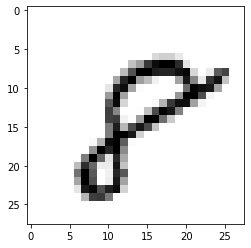

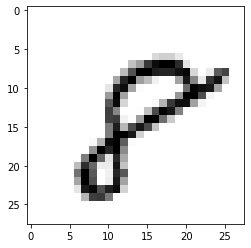

read done


In [211]:
# https://m.blog.naver.com/PostView.nhn?blogId=acwboy&logNo=220584307823&proxyReferer=https:%2F%2Fwww.google.com%2F 파이썬으로 mnist읽기를 참조했습니다. 파이썬으로 읽고 pytorch tensor로 변환했씁니다.
import numpy as np
import sys
import os
from array import array

from struct import *
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

train_x=torch.zeros(size=(60000,28,28),dtype=torch.float32)
train_y=torch.zeros(size=(60000,10),dtype=torch.long)

fp_image = open('./notebooks/train_image','rb')
fp_label = open('./notebooks/train_label','rb')
img = np.zeros((28,28)) #이미지가 저장될 부분
d = 0
l = 0
index=0

#temp

s = fp_image.read(16)    #read first 16byte
l = fp_label.read(8)     #read first  8byte



#숫자 데이터를 읽어서 해당하는 데이터를 지정하고 출력 

k=0#테스트용 index
#read mnist and show number
while True:    
    s = fp_image.read(784) #784바이트씩 읽음
    l = fp_label.read(1) #1바이트씩 읽음

    if not s:
        break;
    if not l:
        break;

    index = int(l[0])
    #print(k,":",index)

#unpack
    img = np.reshape( unpack(len(s)*'B',s), (28,28))
    img=torch.from_numpy(img)
    train_x[k]=img
    train_y[k][index]=1 #one-hot encoding
    k=k+1
    """
    if (k==60000*0.25):
      break
    """

#print(img)
print(k)
print(index)
print(train_x.size())
print(train_y[k-1])
plt.imshow(train_x[k-1][:][:],cmap=cm.binary)
plt.show()
plt.imshow(img,cmap = cm.binary) #binary형태의 이미지 설정
plt.show()

#print(np.shape(lbl)) #label별로 잘 지정됬는지 확인

print("read done")

test 데이터 셋 저장하기

10000
6
torch.Size([10000, 28, 28])
tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])


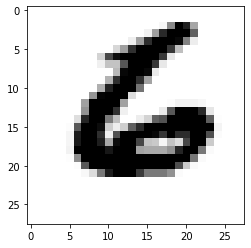

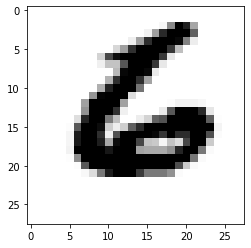

read done


In [212]:
test_x=torch.empty(size=(10000,28,28))
test_y=torch.zeros(size=(10000,10))


fp_image = open('./notebooks/test_image','rb')
fp_label = open('./notebooks/test_label','rb')
img = np.zeros((28,28)) #이미지가 저장될 부분
d = 0
l = 0
index=0

#temp

s = fp_image.read(16)    #read first 16byte
l = fp_label.read(8)     #read first  8byte



#숫자 데이터를 읽어서 해당하는 데이터를 지정하고 출력 

k=0#테스트용 index
#read mnist and show number
while True:    
    s = fp_image.read(784) #784바이트씩 읽음
    l = fp_label.read(1) #1바이트씩 읽음

    if not s:
        break;
    if not l:
        break;

    index = int(l[0])
    #print(k,":",index)

#unpack
    img = np.reshape( unpack(len(s)*'B',s), (28,28))
    img=torch.from_numpy(img)
    test_x[k]=img
    test_y[k][index]=float(1) #one-hot encoding
    k=k+1
    

#print(img)
print(k)
print(index)
print(test_x.size())
print(test_y[9999])
plt.imshow(test_x[9999][:][:],cmap=cm.binary)
plt.show()
plt.imshow(img,cmap = cm.binary) #binary형태의 이미지 설정
plt.show()

#print(np.shape(lbl)) #label별로 잘 지정됬는지 확인

print("read done")

In [205]:
trainDataset=MnistDataset(train_x,train_y)
testDataset=MnistDataset(test_x,test_y)
train_loader=DataLoader(trainDataset,batch_size=batch_size,shuffle=True)
test_loader=DataLoader(testDataset,batch_size=batch_size,shuffle=True)

In [3]:
# get Mnist data
train_loader = torch.utils.data.DataLoader(
  datasets.MNIST(root='../data', train=True, download=True, transform=transforms.ToTensor()), 
    batch_size = batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, download=True,
                 transform=transforms.ToTensor()), 
    batch_size=batch_size, shuffle=True)


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:479: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
#Model
class MLPNet(nn.Module):
  def __init__(self):
    super(MLPNet,self).__init__()
    self.layer1=nn.Linear(784,512)
    self.layer2=nn.Linear(512,256)
    self.layer3=nn.Linear(256,128)
    self.layer4=nn.Linear(128,64)
    self.layer5=nn.Linear(64,32)
    self.layer6=nn.Linear(32,10)
  
  def forward(self,x):
    x = x.float()
    h1 = F.relu(self.layer1(x.view(-1, 784)))
    h2 = F.relu(self.layer2(h1))
    h3 = F.relu(self.layer3(h2))
    h4 = F.relu(self.layer4(h3))
    h5 = F.relu(self.layer5(h4))
    h6 = self.layer6(h5)
    return F.log_softmax(h6, dim=1)

In [5]:
model = MLPNet().to(device)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
criterion=nn.CrossEntropyLoss()

for batch_idx, (data, target) in enumerate(train_loader):
  print(target)
  print(data)
  break


tensor([8, 6, 6, 9, 5, 7, 4, 6, 6, 1, 5, 7, 5, 2, 9, 6, 3, 6, 8, 6, 9, 3, 2, 0,
        8, 7, 4, 6, 6, 4, 8, 7, 4, 9, 1, 9, 7, 8, 9, 9, 5, 5, 8, 3, 2, 4, 3, 0,
        4, 9, 2, 6, 2, 3, 6, 5, 4, 3, 5, 9, 5, 4, 4, 8])
tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0

In [6]:

def train(interval, model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(log_interval, model, device, test_loader,result,epoch):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item() 
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    result[epoch]={'Accuracy':correct/len(test_loader.dataset),'Loss':test_loss}

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format
          (test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    return result

In [7]:
result={}
for epoch in range(1, epochs):
    train(interval, model, device, train_loader, optimizer, epoch)
    result=test(interval, model, device, test_loader,result,epoch)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.300617
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.293755
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.313763
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.304909
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.300399
Train Epoch: 1 [32000/60000 (53%)]	Loss: 2.301080
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.298288
Train Epoch: 1 [44800/60000 (75%)]	Loss: 2.292444
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.296098
Train Epoch: 1 [57600/60000 (96%)]	Loss: 2.300101

Test set: Average loss: 0.0360, Accuracy: 1135/10000 (11%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.293174
Train Epoch: 2 [6400/60000 (11%)]	Loss: 2.286458
Train Epoch: 2 [12800/60000 (21%)]	Loss: 2.276649
Train Epoch: 2 [19200/60000 (32%)]	Loss: 2.282763
Train Epoch: 2 [25600/60000 (43%)]	Loss: 2.278028
Train Epoch: 2 [32000/60000 (53%)]	Loss: 2.250646
Train Epoch: 2 [38400/60000 (64%)]	Loss: 2.238316
Train Epoch: 2 [44800/60000 (75%)]	Loss: 2.146488
Train Epoch: 2 [51200/60000 (85%)]	Loss: 2.000012
T

In [8]:
result

{1: {'Accuracy': 0.1135, 'Loss': 0.03601445062160492},
 2: {'Accuracy': 0.4155, 'Loss': 0.027807666373252868},
 3: {'Accuracy': 0.8499, 'Loss': 0.007781077781319618},
 4: {'Accuracy': 0.9077, 'Loss': 0.005105550207942724},
 5: {'Accuracy': 0.9344, 'Loss': 0.003781666628271341},
 6: {'Accuracy': 0.9408, 'Loss': 0.0033857502903789282},
 7: {'Accuracy': 0.9543, 'Loss': 0.00260479059019126},
 8: {'Accuracy': 0.9547, 'Loss': 0.0024536542074754834},
 9: {'Accuracy': 0.9619, 'Loss': 0.0019742647127248348}}

In [9]:
epoch=[k for k in range(1,10)]
acc=[result[i]['Accuracy'] for i in epoch ]
loss=[result[i]['Loss'] for i in epoch ]

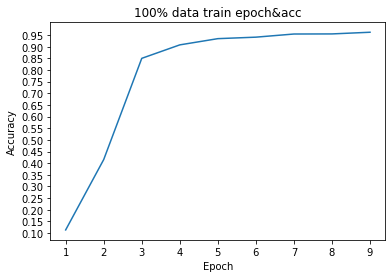

In [17]:
plt.plot(epoch,acc)
plt.xlabel('Epoch')
plt.yticks(np.arange(0.1, 1, step=0.05))
plt.ylabel('Accuracy')
plt.title('100% data train epoch&acc')
plt.show()

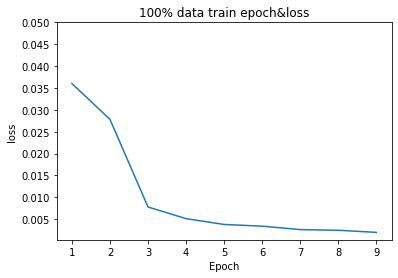

In [19]:
plt.plot(epoch,loss)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.yticks(np.arange(0.05, 0, step=-0.005))
plt.title('100% data train epoch&loss')
plt.show()

In [20]:
model = MLPNet().to(device)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
criterion=nn.CrossEntropyLoss()

def train025(interval, model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
      if batch_idx * len(data)> len(train_loader.dataset)*0.25:
        break
      data, target = data.to(device), target.to(device)
      optimizer.zero_grad()
      output = model(data)
      loss = criterion(output, target)
      loss.backward()
      optimizer.step()
      if batch_idx % interval == 0:
          print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
              epoch, batch_idx * len(data), len(train_loader.dataset),
              100. * batch_idx / len(train_loader), loss.item()))
        

In [21]:

result={}
for epoch in range(1, epochs):
    train025(interval, model, device, train_loader, optimizer, epoch)
    result=test(interval, model, device, test_loader,result,epoch)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.297261
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.304177
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.318357

Test set: Average loss: 0.0361, Accuracy: 1028/10000 (10%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.312802
Train Epoch: 2 [6400/60000 (11%)]	Loss: 2.296464
Train Epoch: 2 [12800/60000 (21%)]	Loss: 2.294103

Test set: Average loss: 0.0361, Accuracy: 1135/10000 (11%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 2.292698
Train Epoch: 3 [6400/60000 (11%)]	Loss: 2.290731
Train Epoch: 3 [12800/60000 (21%)]	Loss: 2.300493

Test set: Average loss: 0.0361, Accuracy: 1174/10000 (12%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 2.296150
Train Epoch: 4 [6400/60000 (11%)]	Loss: 2.288635
Train Epoch: 4 [12800/60000 (21%)]	Loss: 2.295259

Test set: Average loss: 0.0360, Accuracy: 1135/10000 (11%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 2.294561
Train Epoch: 5 [6400/60000 (11%)]	Loss: 2.287276
Train Epoch: 5 [12800/60000 (21%)]	Loss: 2.303728

Test set: Average loss: 0.0360, Acc

In [22]:
epoch=[k for k in range(1,10)]
acc=[result[i]['Accuracy'] for i in epoch ]
loss=[result[i]['Loss'] for i in epoch ]

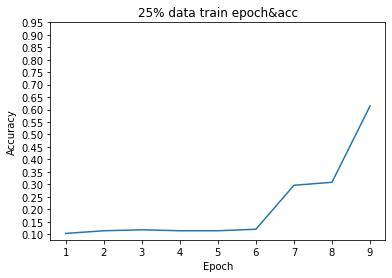

In [23]:
plt.plot(epoch,acc)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.yticks(np.arange(0.1, 1, step=0.05))
plt.title('25% data train epoch&acc')
plt.show()

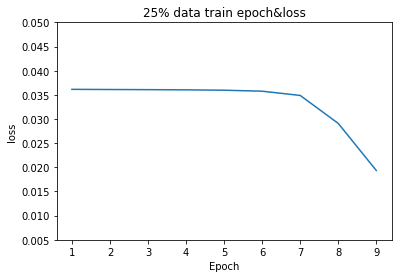

In [24]:
plt.plot(epoch,loss)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.yticks(np.arange(0.05, 0, step=-0.005))
plt.title('25% data train epoch&loss')
plt.show()

In [25]:
model = MLPNet().to(device)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
criterion=nn.CrossEntropyLoss()

def train050(interval, model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
      if batch_idx * len(data)> len(train_loader.dataset)*0.50:
        break
      data, target = data.to(device), target.to(device)
      optimizer.zero_grad()
      output = model(data)
      loss = criterion(output, target)
      loss.backward()
      optimizer.step()
      if batch_idx % interval == 0:
          print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
              epoch, batch_idx * len(data), len(train_loader.dataset),
              100. * batch_idx / len(train_loader), loss.item()))
        

In [26]:

result={}
for epoch in range(1, epochs):
    train050(interval, model, device, train_loader, optimizer, epoch)
    result=test(interval, model, device, test_loader,result,epoch)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.294699
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.302011
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.303606
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.289904
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.298384

Test set: Average loss: 0.0361, Accuracy: 1135/10000 (11%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.299600
Train Epoch: 2 [6400/60000 (11%)]	Loss: 2.297379
Train Epoch: 2 [12800/60000 (21%)]	Loss: 2.289841
Train Epoch: 2 [19200/60000 (32%)]	Loss: 2.295031
Train Epoch: 2 [25600/60000 (43%)]	Loss: 2.299431

Test set: Average loss: 0.0359, Accuracy: 1135/10000 (11%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 2.287553
Train Epoch: 3 [6400/60000 (11%)]	Loss: 2.294701
Train Epoch: 3 [12800/60000 (21%)]	Loss: 2.272957
Train Epoch: 3 [19200/60000 (32%)]	Loss: 2.252647
Train Epoch: 3 [25600/60000 (43%)]	Loss: 2.216244

Test set: Average loss: 0.0341, Accuracy: 3473/10000 (35%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 2.158775
Train Epoch: 4 [6400/60000 (11%)]	Loss: 

In [27]:
epoch=[k for k in range(1,10)]
acc=[result[i]['Accuracy'] for i in epoch ]
loss=[result[i]['Loss'] for i in epoch ]

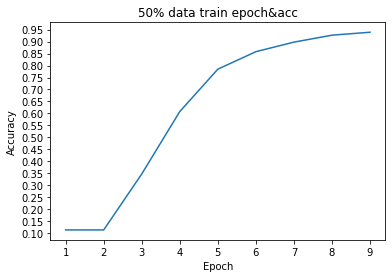

In [28]:
plt.plot(epoch,acc)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.yticks(np.arange(0.1, 1, step=0.05))
plt.title('50% data train epoch&acc')
plt.show()

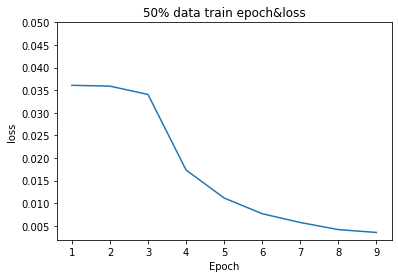

In [29]:
plt.plot(epoch,loss)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.yticks(np.arange(0.05, 0, step=-0.005))
plt.title('50% data train epoch&loss')
plt.show()

In [30]:
model = MLPNet().to(device)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
criterion=nn.CrossEntropyLoss()

def train075(interval, model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
      if batch_idx * len(data)> len(train_loader.dataset)*0.75:
        break
      data, target = data.to(device), target.to(device)
      optimizer.zero_grad()
      output = model(data)
      loss = criterion(output, target)
      loss.backward()
      optimizer.step()
      if batch_idx % interval == 0:
          print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
              epoch, batch_idx * len(data), len(train_loader.dataset),
              100. * batch_idx / len(train_loader), loss.item()))
        

In [31]:

result={}
for epoch in range(1, epochs):
    train075(interval, model, device, train_loader, optimizer, epoch)
    result=test(interval, model, device, test_loader,result,epoch)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.329664
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.288076
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.308319
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.287156
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.319040
Train Epoch: 1 [32000/60000 (53%)]	Loss: 2.293803
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.304459
Train Epoch: 1 [44800/60000 (75%)]	Loss: 2.291061

Test set: Average loss: 0.0361, Accuracy: 1135/10000 (11%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.297767
Train Epoch: 2 [6400/60000 (11%)]	Loss: 2.290913
Train Epoch: 2 [12800/60000 (21%)]	Loss: 2.313333
Train Epoch: 2 [19200/60000 (32%)]	Loss: 2.294075
Train Epoch: 2 [25600/60000 (43%)]	Loss: 2.303956
Train Epoch: 2 [32000/60000 (53%)]	Loss: 2.286801
Train Epoch: 2 [38400/60000 (64%)]	Loss: 2.277178
Train Epoch: 2 [44800/60000 (75%)]	Loss: 2.275529

Test set: Average loss: 0.0356, Accuracy: 1410/10000 (14%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 2.263693
Train Epoch: 3 [6400/60000 (11%)]	Loss: 2.272

In [32]:
epoch=[k for k in range(1,10)]
acc=[result[i]['Accuracy'] for i in epoch ]
loss=[result[i]['Loss'] for i in epoch ]

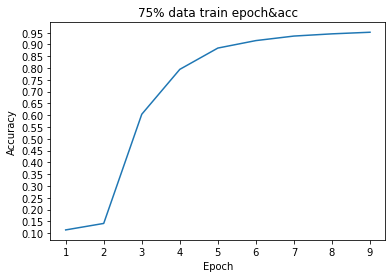

In [33]:
plt.plot(epoch,acc)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.yticks(np.arange(0.1, 1, step=0.05))
plt.title('75% data train epoch&acc')
plt.show()

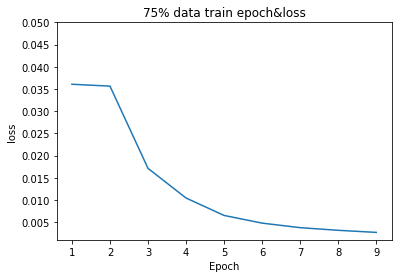

In [34]:
plt.plot(epoch,loss)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.yticks(np.arange(0.05, 0, step=-0.005))
plt.title('75% data train epoch&loss')
plt.show()